In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 7.6 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [2]:
#importing libs
import yfinance as yf
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statsmodels.graphics.api import qqplot
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import shapiro
from scipy import stats
import numpy as np

In [3]:
shareName = 'BHARATFORG.BO'            #stock name.
period = '23y'                         #timeframe
ticker = yf.Ticker(shareName)
dataset = ticker.history(period=period) #dataset variable.
dataset.reset_index(inplace=True)       #removing the existing index
dataset['Date'] = pd.to_datetime(dataset['Date']).dt.date                               #explanation of code for datetime function in the dataset (#dataframe is the input dataframe
dataset['Date'] = pd.to_datetime(dataset['Date'])                                       #to_datetime is the function used to convert datetime string to datetime
dataset.set_index('Date', inplace=True)#setting date as the index                       #DateTime is the datetime column in the dataframe
dataset.head()                                                                          #dt.date is used to convert datetime to date

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-03-08,11.019078,11.131112,10.043299,10.043299,74453,0.0,0.0
2000-03-09,9.468670,10.841989,9.240989,10.784165,2087610,0.0,0.0
2000-03-10,10.408312,10.769712,10.336032,10.552872,1424986,0.0,0.0
2000-03-13,11.131110,11.384090,10.191472,11.384090,113267,0.0,0.0
2000-03-14,11.564787,11.709346,11.058827,11.347947,131602,0.0,0.0


In [4]:
#taking out closing value of the stock,
dataset_2=dataset.filter(['Close'])

dataset plot

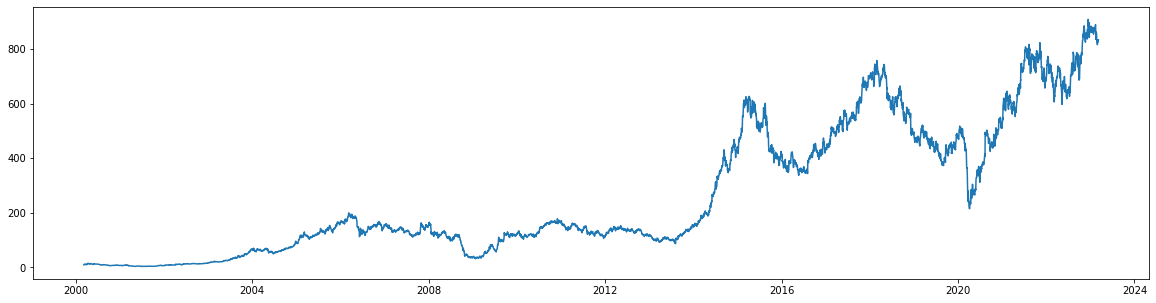

In [5]:
plt_dataset2 = plt.figure(figsize=(20, 5)) 
plt.plot(dataset_2)

In [6]:
dataset.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [7]:
#stats of the dataset
dataset.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,5747.000000,5747.000000,5747.000000,5747.000000,5.747000e+03,5747.000000,5747.000000
mean,261.960063,265.983459,257.180927,261.326672,2.324216e+05,0.009245,0.001218
std,240.753154,243.988478,236.938939,240.264290,4.547831e+05,0.140960,0.071032
min,3.791238,3.952568,0.004690,3.823503,0.000000e+00,0.000000,0.000000
25%,81.888721,84.648672,79.221517,82.226181,5.761850e+04,0.000000,0.000000
50%,142.892211,145.292133,140.217598,142.446182,1.171200e+05,0.000000,0.000000
75%,452.265688,459.738859,445.980421,451.569778,2.429180e+05,0.000000,0.000000
max,912.950012,919.500000,892.599976,908.849976,1.707567e+07,5.500000,5.000000


In [8]:
dataset_2.size

5747

stl plot

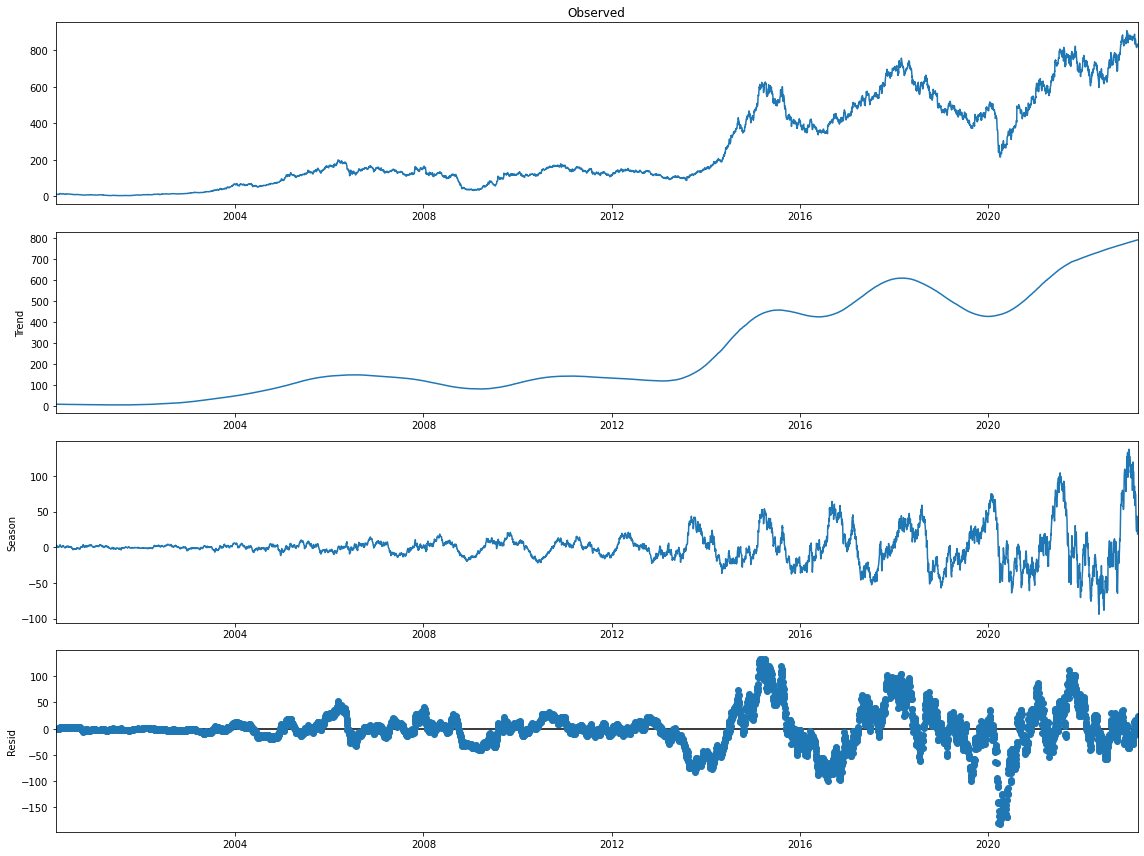

In [9]:
#stl decomposition

plt.rc("figure", figsize=(16, 12))

stl = STL(dataset_2, seasonal=7,period=365)

res=stl.fit()

fig_decompose = res.plot()


In [10]:
def adf_test(dataset_2):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(dataset_2, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

In [11]:
adf_test(dataset_2)

Results of Dickey-Fuller Test:
Test Statistic                   -0.017158
p-value                           0.957090
#Lags Used                       31.000000
Number of Observations Used    5715.000000
Critical Value (1%)              -3.431495
Critical Value (5%)              -2.862046
Critical Value (10%)             -2.567039
dtype: float64


In [12]:
def kpss_test(dataset_2):
    print("Results of KPSS Test:")
    kpsstest = kpss(dataset_2, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

In [13]:
kpss_test(dataset_2)

Results of KPSS Test:
Test Statistic           10.3406
p-value                   0.0100
Lags Used                44.0000
Critical Value (10%)      0.3470
Critical Value (5%)       0.4630
Critical Value (2.5%)     0.5740
Critical Value (1%)       0.7390
dtype: float64


series is stationary


Taking the first difference for achieving stationary series







In [14]:
#taking the first difference
df_diff=dataset_2.diff().dropna()

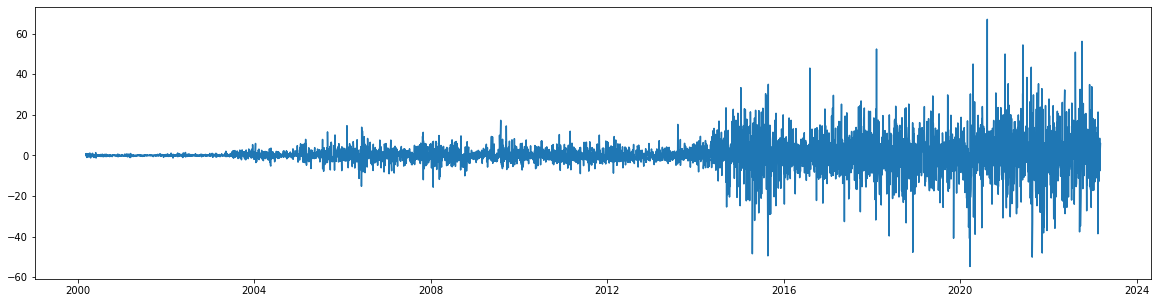

In [15]:
#visualising the differenced series
plt_diff = plt.figure(figsize=(20, 5)) 
plt.plot(df_diff)

train/test


In [16]:
testing_data, training_data = df_diff[len(df_diff)-1974:],df_diff[:len(df_diff)-1974]

In [17]:
training_data

,Close
Date,
2000-03-09,0.740867
2000-03-10,-0.231294
2000-03-13,0.831219
2000-03-14,-0.036143
2000-03-15,0.907116
...,...
2015-03-05,12.452576
2015-03-09,-10.412354
2015-03-10,6.636780


In [18]:
testing_data

,Close
Date,
2015-03-13,-21.762695
2015-03-16,4.455566
2015-03-17,6.730591
2015-03-18,-5.839233
2015-03-19,4.596436
...,...
2023-03-01,8.049988
2023-03-02,8.450012
2023-03-03,-7.549988


pacf and acf

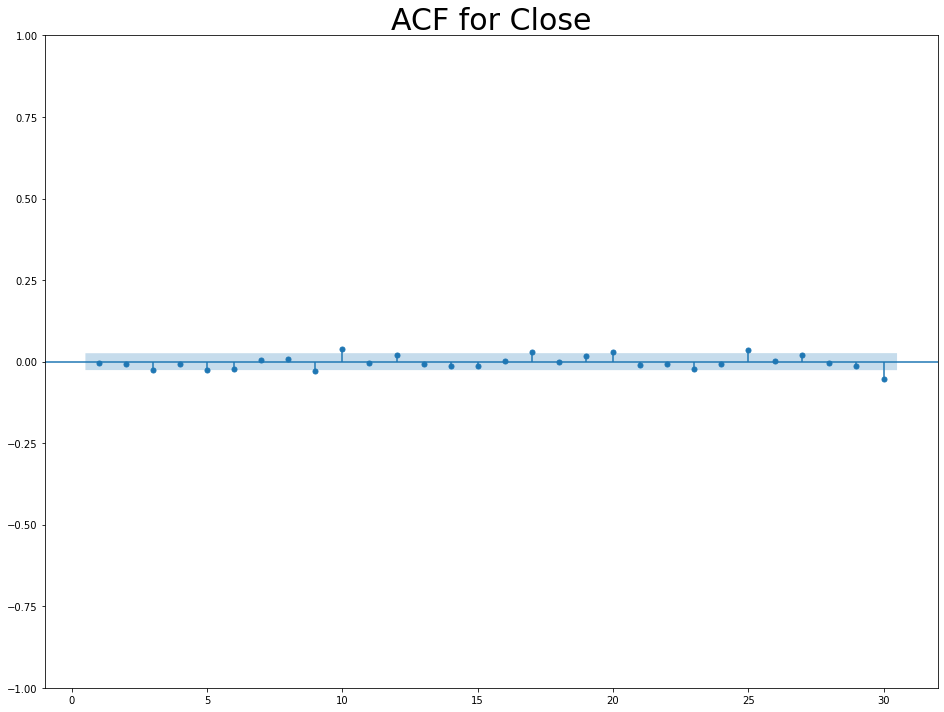

In [19]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_diff[1:], zero= False , lags=30);
plt.title("ACF for Close", size = 30)
plt.show()

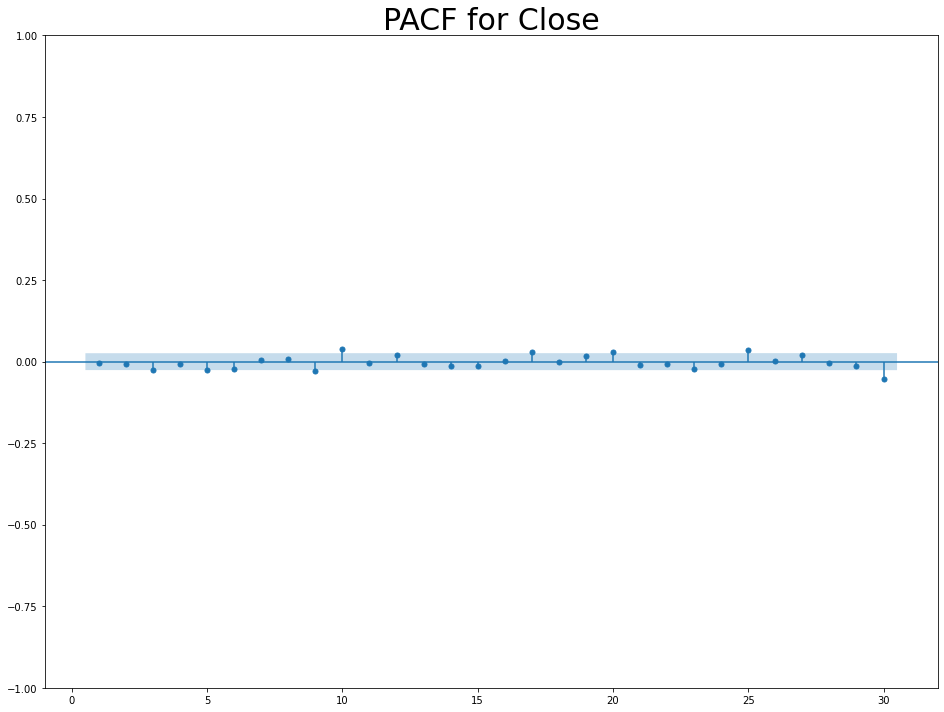

In [20]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(df_diff[1:], zero= False , lags=30);
plt.title("PACF for Close", size = 30)
plt.show()

In [38]:
model_arma= ARIMA(training_data, order =(9,0,3)).fit()

In [39]:
print(model_arma.params)

const      0.179854
ar.L1     -0.001226
ar.L2     -0.100076
ar.L3     -0.838046
ar.L4      0.047373
ar.L5      0.026037
ar.L6      0.056706
ar.L7      0.031597
ar.L8      0.055815
ar.L9      0.030044
ma.L1      0.010421
ma.L2      0.114056
ma.L3      0.830698
sigma2    10.037922
dtype: float64


In [41]:
fitted_values = model_arma.fittedvalues

In [42]:
fitted_values_pd=pd.DataFrame(fitted_values)

In [32]:
training_data_pd=pd.DataFrame(training_data)

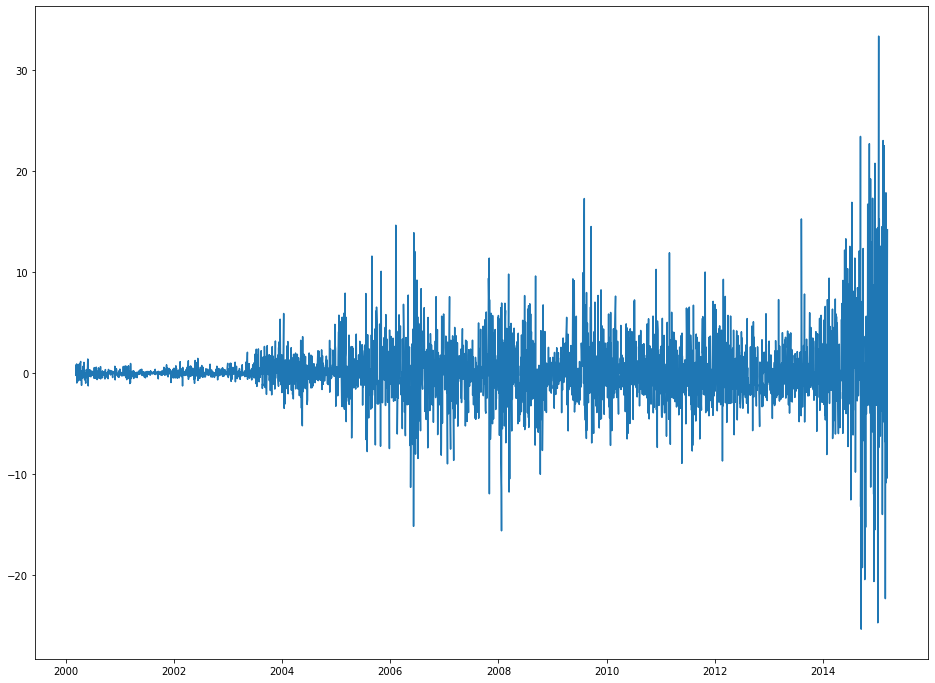

In [33]:
plt.plot(training_data_pd)

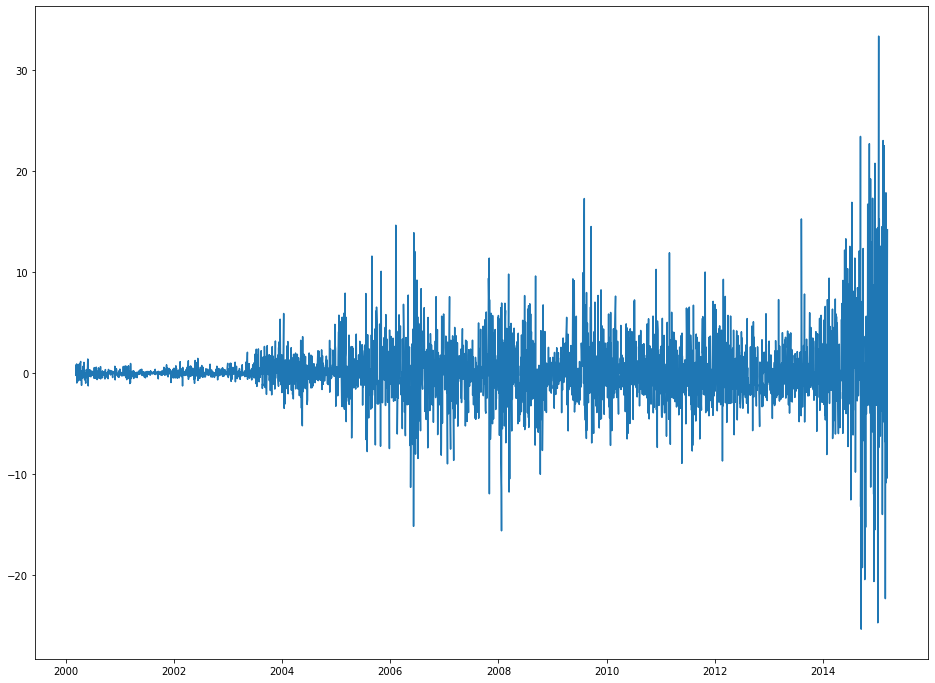

In [34]:
plt.plot(training_data)

In [43]:
frame=[training_data_pd,fitted_values_pd]
df_concat=pd.concat(frame,ignore_index=False, sort=False)

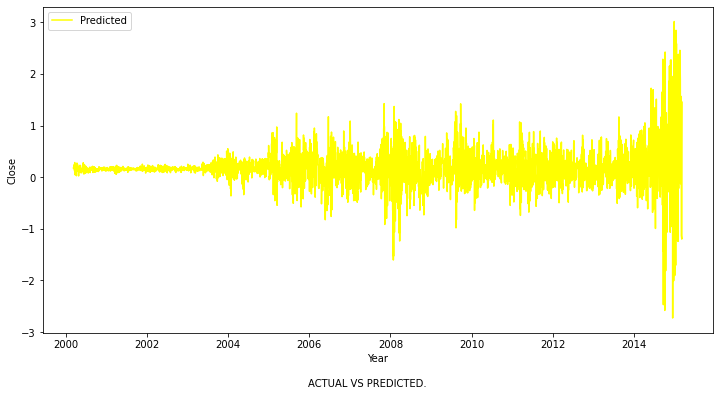

In [47]:
  fig2=plt.figure(figsize=(12,6))
  plt.plot(df_concat[0],color='yellow',label='Predicted')
  #plt.plot(df_concat['Close'],color='red',label='Actual')
  plt.xlabel('Year')
  plt.ylabel('Close')
  fig2.text(.5,.0001, s='ACTUAL VS PREDICTED.', ha='center')
  plt.legend()

In [28]:
start=len(training_data)

In [29]:
end=len(df_diff)

In [45]:
model_arma.aic

19467.180777808564

In [48]:
#predict the test data
predictions = model_arma.predict(start,end)

In [56]:
prediction_list_pd=pd.DataFrame(predictions)


prediction plot


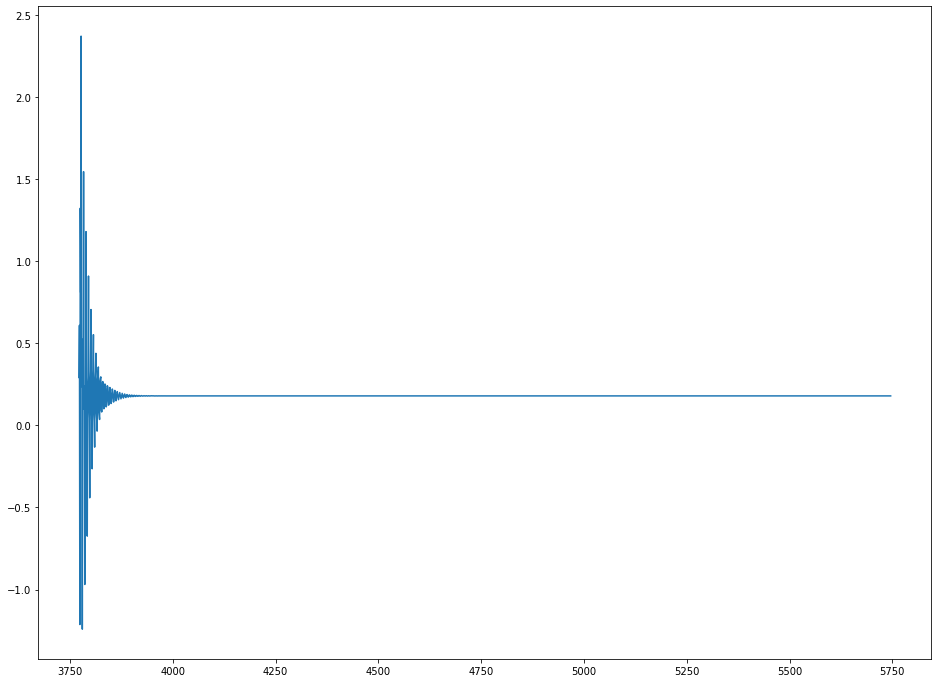

In [49]:
plt.plot(predictions)

In [57]:
testing_data['predicted'] = prediction_list_pd.values[1:]
testing_data

,Close,predicted
Date,,
2015-03-13,-21.762695,0.609674
2015-03-16,4.455566,-1.213395
2015-03-17,6.730591,1.323791
2015-03-18,-5.839233,0.810321
2015-03-19,4.596436,2.372185
...,...,...
2023-03-01,8.049988,0.179854
2023-03-02,8.450012,0.179854
2023-03-03,-7.549988,0.179854


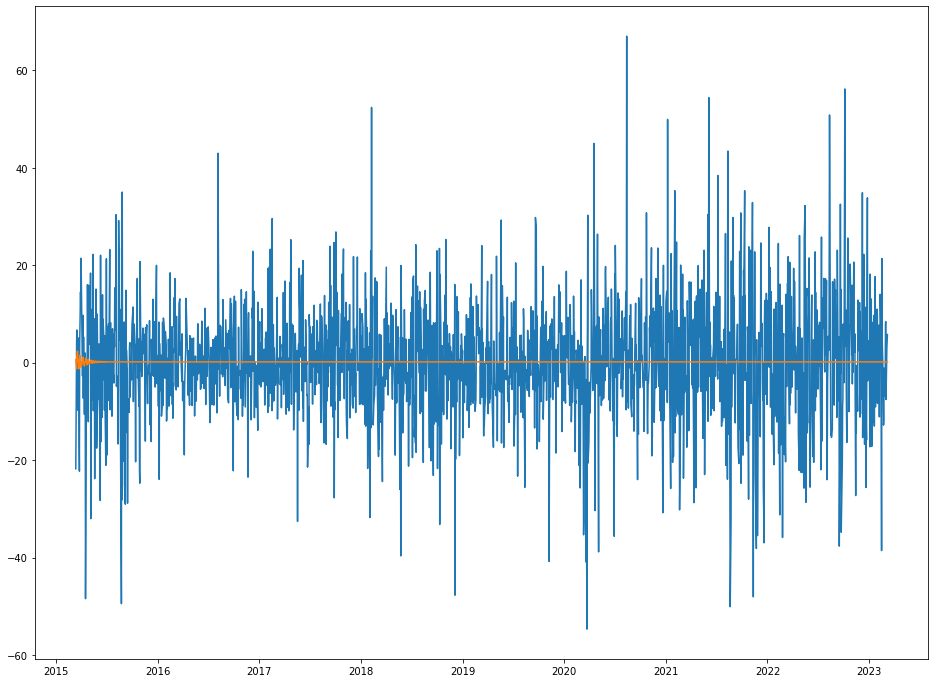

In [58]:

plt.plot(testing_data)

In [51]:
#results mse and rmse
mse = np.mean(model_arma.resid**2)
rmse = np.sqrt(mse)
print(mse)
print(rmse)



10.13095695231551
3.182916422452137


In [52]:
 from sklearn.metrics import mean_squared_error

In [54]:
mean_squared_error(training_data, model_arma.resid,squared=False)

0.4010528352707595